In [60]:
import ast
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing Data 📊

In [155]:
pp_data = pd.read_csv('big-data/PP_recipes.csv')
pp_data[['id', 'name_tokens', 'ingredient_tokens', 'steps_tokens', 'ingredient_ids']].head()

id                                        name_tokens  \
0  424415  [40480, 37229, 2911, 1019, 249, 6878, 6878, 28...   
1  146223       [40480, 18376, 7056, 246, 1531, 2032, 40481]   
2  312329     [40480, 21044, 16954, 8294, 556, 10837, 40481]   
3   74301                       [40480, 10025, 31156, 40481]   
4   76272  [40480, 17841, 252, 782, 2373, 1641, 2373, 252...   

                                   ingredient_tokens  \
0  [[2911, 1019, 249, 6878], [1353], [6953], [153...   
1  [[17918], [25916], [2507, 6444], [8467, 1179],...   
2  [[5867, 24176], [1353], [6953], [1301, 11332],...   
3  [[1270, 1645, 28447], [21601], [27952, 29471, ...   
4  [[1430, 11434], [1430, 17027], [1615, 23, 695,...   

                                        steps_tokens  \
0  [40480, 40482, 21662, 481, 6878, 500, 246, 161...   
1  [40480, 40482, 729, 2525, 10906, 485, 43, 8393...   
2  [40480, 40482, 8240, 481, 24176, 296, 1353, 66...   
3  [40480, 40482, 5539, 21601, 1073, 903, 2324, 4...   
4  [40480, 40482, 14046, 1430, 11434, 488, 17027,...   

                                      ingredient_ids  
0                      [389, 7655, 6270, 1527, 3406]  
1  [2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...  
2  [1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...  
3   [7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]  
4                            [3484, 6324, 7594, 243]

In [156]:
ingredients_clean = pd.read_pickle('big-data/ingr_map.pkl')
ingredients_clean[['raw_ingr', 'processed', 'replaced', 'id']].head()

raw_ingr  \
0  medium heads bibb or red leaf lettuce, washed,...   
1              mixed baby lettuces and spring greens   
2                               romaine lettuce leaf   
3                               iceberg lettuce leaf   
4                                red romaine lettuce   

                                           processed replaced    id  
0  medium heads bibb or red leaf lettuce, washed,...  lettuce  4308  
1               mixed baby lettuces and spring green  lettuce  4308  
2                               romaine lettuce leaf  lettuce  4308  
3                               iceberg lettuce leaf  lettuce  4308  
4                                red romaine lettuce  lettuce  4308

In [157]:
len(ingredients_clean.replaced.unique())

8023

In [158]:
raw = pd.read_csv('big-data/RAW_recipes.csv')
raw[['id', 'ingredients']].head()

id                                        ingredients
0  137739  ['winter squash', 'mexican seasoning', 'mixed ...
1   31490  ['prepared pizza crust', 'sausage patty', 'egg...
2  112140  ['ground beef', 'yellow onions', 'diced tomato...
3   59389  ['spreadable cheese with garlic and herbs', 'n...
4   44061  ['tomato juice', 'apple cider vinegar', 'sugar...

In [159]:
def get_id(ingredient_str):
    # Transforms string input to pre-processed ID
    ingredient_id = ingredients_clean[ingredients_clean[‘raw_ingr’] ==ingredient_str]
    ingredient_id.reset_index(inplace=True)
    return ingredient_id.loc[0,‘id’]

SyntaxError: invalid character in identifier (<ipython-input-159-fa6eb440bb1a>, line 3)

In [ ]:
def get_name(ingredient_id):
    # Transforms ID back to pre-processed string
    ingredient_name = ingredients_clean[ingredients_clean['id'] == ingredient_id]
    ingredient_name.reset_index(inplace=True)
    return ingredient_name.loc[0,'replaced']

In [ ]:
def list_to_names(ingredient_id_list):
    # Takes in list of ingredient IDs and returns list of names
    list_ = []
    for id in ingredient_id_list:
        list_.append(get_name(id))
    return list_

In [161]:
pp_data.ingredient_ids = pp_data.ingredient_ids.apply(ast.literal_eval)

In [162]:
pp_data.ingredient_ids[0]

[389, 7655, 6270, 1527, 3406]

In [164]:
for e in pp_data.ingredient_ids[0]:
    print(get_name(e))

basmati rice
water
salt
cinnamon stick
green cardamom pod


In [165]:
recipes = []
for lis in pp_data.ingredient_ids:
    recipe = []
    for e in lis:
        name = get_name(e)
        recipe.append(name)
    recipes.append(recipe)

In [170]:
recipes

[['basmati rice', 'water', 'salt', 'cinnamon stick', 'green cardamom pod'],
 ['flmy',
  'oat',
  'brown sugar',
  'pecan',
  'butter',
  'egg',
  'solid pack pumpkin',
  'sweetened condensed milk',
  'cinnamon',
  'ginger',
  'nutmeg',
  'salt'],
 ['chicken broth',
  'water',
  'salt',
  'black pepper',
  'onion powder',
  'cayenne pepper',
  'mustard powder',
  'soy sauce',
  'worcestershire sauce',
  'potato',
  'tomatoes seasoned',
  'whipping cream',
  'velveeta cheese',
  'cheddar',
  'flmy'],
 ['wonton wrapper',
  'hamburger',
  'taco seasoning',
  'salsa',
  'cheese',
  'sour cream',
  'olive',
  'guacamole'],
 ['ground beef', 'sausage', 'velveeta cheese', 'ature party rye round'],
 ['strawberry jell-o gelatin dessert',
  'water',
  'strawberry',
  'sugar',
  'cool whip',
  'angel food cake',
  'strawberry juice',
  'cornstarch',
  'butter',
  'cream'],
 ['pork chop',
  'flmy',
  'salt',
  'pepper',
  'egg',
  'buttermilk',
  'chicken in a biscuit cracker',
  'oil',
  'butter'],

In [151]:
len(raw) == len(pp_data)

False

## Agenda

#### Introduction

- Verify the biggest array of Ingredients (Word2Vec, window=X)
- Vectorize each Word of Ingredients
- Add Column Ingredients Vectorized
- Average the Ingredients array into a single Vector
- Add a Column Vector Average
- Verify How many unique vectors exist in our dataset: Vocabulary Size

#### Dimensionality Reduction

- Principal Component Analysis or T-Distributed Stochastic Neighbouring Entities (T-SNE)

#### Clustering

- Run K-Means Unsupervised Learning Algorithm for each Ingredient (Word)
- Run K-Means Unsupervised Learning Algorithm for whole Ingredients Average

#### Model Tuning

- Tryout other Models likewise Doc2Vec and FastText to compare performance
- GridSearch and RandomSearch for params optimization

## 👉 It seems Word2Vec demands to be trained before vectorizing words

In [93]:
from gensim.models import Word2Vec

- 👉 Word2Vec recieves a list of lists as an argument
- 👉 Being each list inside the bigger list a list of words, as type of strings

## 👉 Sort words alphabetically

In [171]:
word2vec = Word2Vec(sentences=recipes, window=11, min_count=1)

In [174]:
word2vec.wv['egg']

array([-0.8002842 , -2.0869706 , -1.0550407 ,  0.68114096, -0.4773454 ,
        0.84864736,  0.44668975,  1.2189358 , -2.530052  ,  0.17033194,
        0.145997  , -0.5178026 ,  0.85322225,  0.35785645,  0.6568954 ,
       -1.9545823 ,  1.506581  , -0.37783033,  1.6782866 ,  0.04582551,
        1.3055283 , -0.76670617,  1.0462604 ,  2.0045388 , -0.93445015,
        0.57356256, -0.00642586, -0.01326417,  0.29194334, -1.3750237 ,
        0.48045728,  0.05435251,  1.910978  ,  2.4080086 , -0.29571855,
        0.15716979,  1.1684963 ,  0.2480278 ,  0.10900857,  1.050514  ,
        0.33842093,  0.88760996,  1.8829179 , -0.4844581 , -1.0993947 ,
        2.56839   ,  0.50645834,  1.3095008 , -2.1018205 , -1.2339376 ,
       -0.03875975, -0.47159564, -0.85006195,  0.35790467,  0.8969404 ,
       -0.8421909 , -1.3140705 ,  0.00919409, -0.4272419 ,  0.24122424,
       -1.3900636 ,  0.82864916, -0.56583107,  1.1529474 ,  0.12586416,
       -2.5704036 ,  1.4457413 , -1.2641692 , -1.7592278 ,  2.14

In [175]:
word2vec.wv.most_similar('lettuce')

[('salad green', 0.8023909330368042),
 ('mixed salad green', 0.790459156036377),
 ('romaine leaf', 0.721089243888855),
 ('mixed green', 0.7066875696182251),
 ('alfalfa sprout', 0.6967536211013794),
 ('avocado', 0.6818212270736694),
 ('mixed sprout', 0.6793664693832397),
 ('baby green', 0.6628055572509766),
 ('english cucumber', 0.6563583612442017),
 ('seedless cucumber', 0.6349694728851318)]

In [176]:
def get_wv_vec(ingredients, word2vec):
    w2v_i = []
    vocabulary = []
    for ingredients_list in ingredients:
        ingredients_w2v = []
        for word in ingredients_list:
            word = word2vec.wv[word]
            vocabulary.append(word)
            ingredients_w2v.append(word)
        w2v_i.append(ingredients_w2v)
    return w2v_i, vocabulary

In [177]:
w2v_i, vocabulary = get_wv_vec(recipes, word2vec)

In [178]:
type(w2v_i), len(w2v_i)

(list, 178265)

In [19]:
type(vocabulary), len(vocabulary)

(list, 2096582)

In [20]:
big_data.shape

(231637, 4)

In [21]:
big_data['ingredients_word2vec'] = w2v_i

In [22]:
big_data.head()

name      id  \
0  arriba   baked winter squash mexican style  137739   
1            a bit different  breakfast pizza   31490   
2                   all in the kitchen  chili  112140   
3                          alouette  potatoes   59389   
4          amish  tomato ketchup  for canning   44061   

                                         ingredients  n_ingredients  \
0  [butter, honey, mexican seasoning, mixed spice...              7   
1  [cheese, eggs, milk, prepared pizza crust, sal...              6   
2  [cheddar cheese, chili powder, diced tomatoes,...             13   
3  [new potatoes, olive oil, parsley, pepper, red...             11   
4  [apple cider vinegar, cinnamon oil, clove oil,...              8   

                                ingredients_word2vec  
0  [[-2.3419166, 0.9285648, -0.5354416, 1.3541702...  
1  [[0.9325569, -0.35128152, -1.217522, -0.881005...  
2  [[1.1353292, 1.6405444, -0.9359941, -0.6166214...  
3  [[-1.207242, -0.1542747, -0.31802517, 0.443121...  
4  [[1.1030298, 1.4975662, -0.5814419, -0.6901564...

-------------------------------

## Getting Vocabulary Dict

In [179]:
def get_wv_vec_dic(ingredients, word2vec):
    w2v_i = []
    vocabulary = {}
    for ingredients_list in ingredients:
        ingredients_w2v = []
        for word in ingredients_list:
            word_vec = word2vec.wv[word]
            vocabulary[word] = word_vec
            ingredients_w2v.append(word)
        w2v_i.append(ingredients_w2v)
    return w2v_i, vocabulary

In [180]:
w2v_ii, vocabulary_dict = get_wv_vec_dic(recipes, word2vec)

In [181]:
vocabulary_dictator = pd.DataFrame.from_dict(vocabulary_dict)

In [182]:
vocabulary_dictator.head()

basmati rice     water      salt  cinnamon stick  green cardamom pod  \
0     -0.276580  1.029886  1.515004       -2.439312           -0.365638   
1      0.881535  0.752381 -0.219015        1.586593            0.486348   
2     -0.419398  0.603331 -1.509439       -0.866768           -0.210794   
3     -0.584841  0.661382  0.875397        0.233401            0.095586   
4      1.085960  1.986611  0.999583        2.400961            0.197006   

       flmy       oat  brown sugar     pecan    butter  ...  \
0  0.126149 -1.029800    -0.020762 -2.069875 -1.051187  ...   
1  0.713252 -0.545706     0.141938 -2.440227  0.038149  ...   
2 -0.026399 -1.847246    -1.569232 -1.219285  1.064302  ...   
3 -0.207861  1.229388     2.300626  0.458669  1.177370  ...   
4  0.159088 -1.485398    -2.408472  0.156884  0.638418  ...   

   rock lobster tail  elderflower head  venison loin steak  rouladen beef  \
0           0.007346         -0.011591            0.009232       0.002805   
1           0.010087         -0.004024            0.012151      -0.003029   
2           0.004424         -0.016885           -0.008443      -0.018430   
3           0.006982          0.011919            0.012306       0.020090   
4          -0.012883         -0.003441            0.003209      -0.012607   

   condensed minestrone soup   brinjal    pitaya  \
0                   0.003168  0.010710  0.005381   
1                  -0.015910 -0.017263  0.004206   
2                  -0.027349 -0.038915 -0.044050   
3                   0.014623  0.025948  0.005748   
4                  -0.001149 -0.022206 -0.008717   

   individual size prebaked pizza crust  yellow pattypan squash  tamarillo  
0                              0.002865                0.016314  -0.002514  
1                             -0.006779                0.017635  -0.003033  
2                             -0.002822                0.004038  -0.040817  
3                              0.015296               -0.005145   0.024662  
4                             -0.015276               -0.013634  -0.030293  

[5 rows x 7993 columns]

In [183]:
vocabulary_dictator.shape

(100, 7993)

In [184]:
Xp = vocabulary_dictator.T
Xp.head()

0         1         2         3         4   \
basmati rice       -0.276580  0.881535 -0.419398 -0.584841  1.085960   
water               1.029886  0.752381  0.603331  0.661382  1.986611   
salt                1.515004 -0.219015 -1.509439  0.875397  0.999583   
cinnamon stick     -2.439312  1.586593 -0.866768  0.233401  2.400961   
green cardamom pod -0.365638  0.486348 -0.210794  0.095586  0.197006   

                          5         6         7         8         9   ...  \
basmati rice       -1.422178 -0.407592  0.370858 -0.568348  0.845320  ...   
water               1.126900 -1.042996  0.154641 -0.220418  0.057372  ...   
salt                1.489757 -2.987689 -1.250810 -0.694145 -1.150789  ...   
cinnamon stick     -0.166397 -0.460763 -0.091296 -0.775506 -0.058896  ...   
green cardamom pod  0.185778 -0.421025  0.206736  0.034718 -0.322509  ...   

                          90        91        92        93        94  \
basmati rice       -0.767202  0.123172  0.385199  0.532115 -0.442171   
water               0.702235 -0.064901 -0.160875  0.508030 -0.279746   
salt               -0.328130 -0.303588  1.832301  0.101565  0.210759   
cinnamon stick     -0.794454  2.220531 -1.772667  1.648189  1.648807   
green cardamom pod -0.119427  0.442604 -0.472600  0.144952  0.023897   

                          95        96        97        98        99  
basmati rice       -1.829759  1.267755  0.098537  1.166103 -0.193150  
water              -1.084528  0.349852  1.559336  0.684063 -0.485707  
salt                0.478857  0.671135 -0.317605 -0.117048 -0.632519  
cinnamon stick     -2.341634  1.756411  0.545137  1.183583 -1.894063  
green cardamom pod -0.564189  0.427276  0.650229  0.300539 -0.670593  

[5 rows x 100 columns]

In [185]:
Xp.shape

(7993, 100)

<AxesSubplot:>

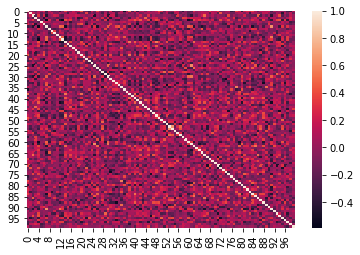

In [186]:
sns.heatmap(pd.DataFrame(Xp).corr())

-----------------

# Principal Component Analysis (PCA) 🔧

In [187]:
from sklearn.decomposition import PCA

In [188]:
pca = PCA()
pca.fit(Xp)

PCA()

<AxesSubplot:>

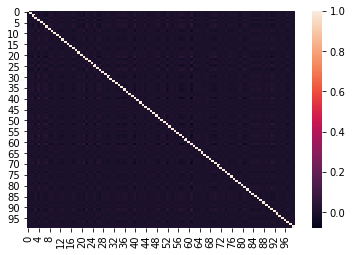

In [189]:
pca_com = pd.DataFrame(pca.components_)
sns.heatmap(pd.DataFrame(pca_com).corr())

In [34]:
sns.heatmap(pd.DataFrame(vocabulary_dictator).corr())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/vitor/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-3887bc862725>", line 1, in <module>
    sns.heatmap(pd.DataFrame(vocabulary_dictator).corr())
  File "/home/vitor/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "/home/vitor/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/matrix.py", line 535, in heatmap
    plotter = _HeatMapper(data, vmin, vmax, cmap, center, robust, annot, fmt,
  File "/home/vitor/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/matrix.py", line 155, in __init__
    self._determine_cmap_params(plot_data, vmin, vmax,
  File "/home/vitor/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/matrix.py", line 189, in _

TypeError: object of type 'NoneType' has no len()

# Clustering with K-Means Algorithm 🪐

In [190]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [191]:
kmeans = KMeans()

In [192]:
final_df = pca.transform(Xp)
final_df = pd.DataFrame(final_df)
final_df.head()

0         1         2         3         4         5         6   \
0 -2.425624  4.403652  1.557967 -0.094421 -2.554872 -0.233829  2.036038   
1 -1.048758  1.017017  2.876964 -0.005457 -0.491140  0.921243  0.311058   
2 -1.622470  0.682743  2.125769 -1.196204  0.995982 -0.711990  0.308008   
3  0.526841  8.868882  3.922969 -2.943049 -3.655905  2.248162 -3.567814   
4  0.428983  2.263977  0.869029 -0.127361 -1.425676  0.149435 -0.291440   

         7         8         9   ...        90        91        92        93  \
0 -0.255604  0.116674  2.741699  ... -0.000724  0.022878 -0.008233  0.019889   
1  0.274888 -0.326197 -0.280347  ...  0.011904 -0.058926  0.186570 -0.025319   
2  0.072087  1.036772  1.650909  ... -0.054080 -0.011463  0.004417 -0.188561   
3 -1.049020 -2.308931  2.534002  ... -0.090784 -0.046332  0.002093  0.059488   
4 -0.322463 -0.414263  0.573127  ...  0.012501  0.011624  0.009036  0.011602   

         94        95        96        97        98        99  
0  0.002162  0.006793  0.004562  0.000526  0.002597  0.008008  
1  0.026375 -0.000459  0.049640 -0.045495  0.015593 -0.006500  
2 -0.003692  0.074737 -0.013121  0.026129  0.002085  0.035071  
3  0.002364 -0.018229 -0.017411  0.067450  0.064202  0.023113  
4 -0.001889  0.004536  0.006207  0.002640  0.006682 -0.002604  

[5 rows x 100 columns]

In [193]:
final_df.set_index(Xp.index, inplace=True)
final_df.head()

0         1         2         3         4   \
basmati rice       -2.425624  4.403652  1.557967 -0.094421 -2.554872   
water              -1.048758  1.017017  2.876964 -0.005457 -0.491140   
salt               -1.622470  0.682743  2.125769 -1.196204  0.995982   
cinnamon stick      0.526841  8.868882  3.922969 -2.943049 -3.655905   
green cardamom pod  0.428983  2.263977  0.869029 -0.127361 -1.425676   

                          5         6         7         8         9   ...  \
basmati rice       -0.233829  2.036038 -0.255604  0.116674  2.741699  ...   
water               0.921243  0.311058  0.274888 -0.326197 -0.280347  ...   
salt               -0.711990  0.308008  0.072087  1.036772  1.650909  ...   
cinnamon stick      2.248162 -3.567814 -1.049020 -2.308931  2.534002  ...   
green cardamom pod  0.149435 -0.291440 -0.322463 -0.414263  0.573127  ...   

                          90        91        92        93        94  \
basmati rice       -0.000724  0.022878 -0.008233  0.019889  0.002162   
water               0.011904 -0.058926  0.186570 -0.025319  0.026375   
salt               -0.054080 -0.011463  0.004417 -0.188561 -0.003692   
cinnamon stick     -0.090784 -0.046332  0.002093  0.059488  0.002364   
green cardamom pod  0.012501  0.011624  0.009036  0.011602 -0.001889   

                          95        96        97        98        99  
basmati rice        0.006793  0.004562  0.000526  0.002597  0.008008  
water              -0.000459  0.049640 -0.045495  0.015593 -0.006500  
salt                0.074737 -0.013121  0.026129  0.002085  0.035071  
cinnamon stick     -0.018229 -0.017411  0.067450  0.064202  0.023113  
green cardamom pod  0.004536  0.006207  0.002640  0.006682 -0.002604  

[5 rows x 100 columns]

In [194]:
kmeans.fit(final_df)

KMeans()

Text(0, 0.5, 'PC 2')

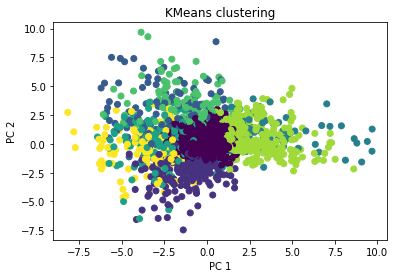

In [195]:
plt.scatter(final_df[0], final_df[1], c=kmeans.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

/home/vitor/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'PC 2')

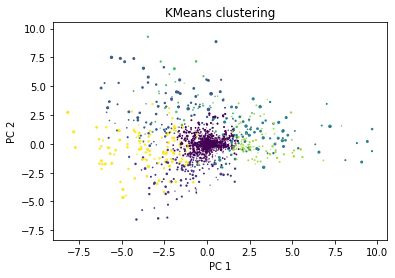

In [196]:
plt.scatter(final_df[0], final_df[1], final_df[2], c=kmeans.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

In [197]:
import plotly.express as px
fig = px.scatter(x=final_df[0], y=final_df[1], color=kmeans.labels_, hover_name=final_df.index)
fig.show()

In [199]:
fig = px.scatter_3d(x=final_df[0], y=final_df[1], z=final_df[2], color=kmeans.labels_, hover_name=final_df.index)
fig.show()

## Chasser La'assot:

- KMeans Elbow Method for findind best n_clusters param
- Grid / Randomized Search for Fine Tuning
- Method to compare KMeans Clustering x Word2Vec most_similar_
- Discover if PCA must do on Xp (vocab.T) or vocab (rows x columns)